#### MODEL BUILDING

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the balanced dataset
df = pd.read_csv('balanced_encoded_asd_dataset.csv')

# Split features and target
X = df.drop('ASD_Traits_Class', axis=1)
y = df['ASD_Traits_Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [2]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]

# Print classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.98      1.00      0.99       144

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292



In [4]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       144

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



In [5]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

# Print classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       144

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7035 - loss: 0.6077 - val_accuracy: 0.9356 - val_loss: 0.3182
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9459 - loss: 0.2393 - val_accuracy: 0.9700 - val_loss: 0.1200
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9809 - loss: 0.0950 - val_accuracy: 0.9785 - val_loss: 0.0682
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9943 - loss: 0.0421 - val_accuracy: 0.9914 - val_loss: 0.0482
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9929 - loss: 0.0306 - val_accuracy: 0.9957 - val_loss: 0.0334
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0211 - val_accuracy: 0.9957 - val_loss: 0.0298
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9957 - val_loss: 0.0222
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.9957 - val_loss

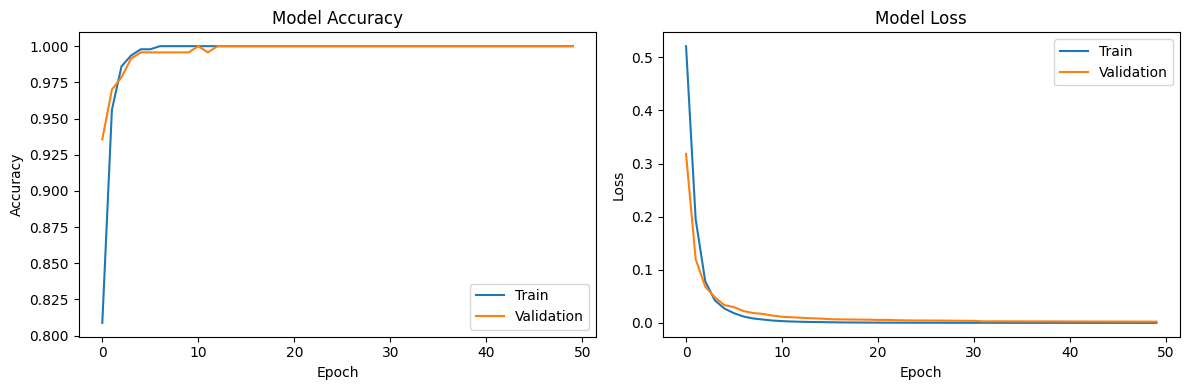

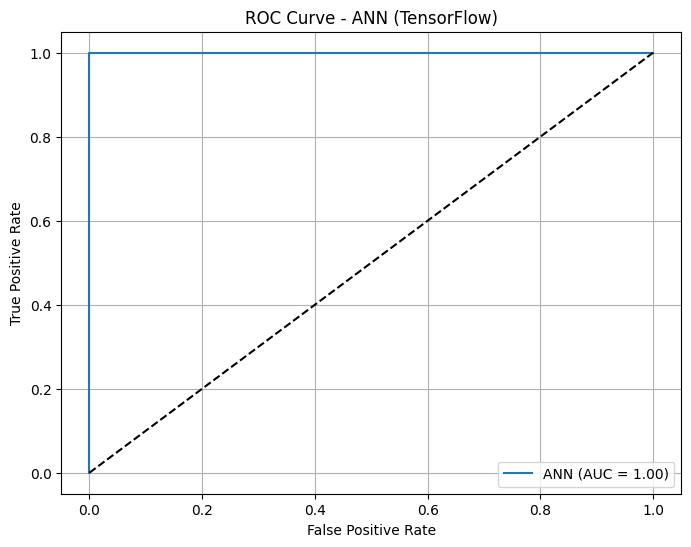

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = ann_model.fit(X_train_scaled, y_train,
                       epochs=50, 
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

# Make predictions
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype(int)
y_pred_proba_ann = ann_model.predict(X_test_scaled)

# Print classification report
print("\nANN (TensorFlow) Classification Report:")
print(classification_report(y_test, y_pred_ann))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_proba_ann)
auc_ann = auc(fpr_ann, tpr_ann)
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN (TensorFlow)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

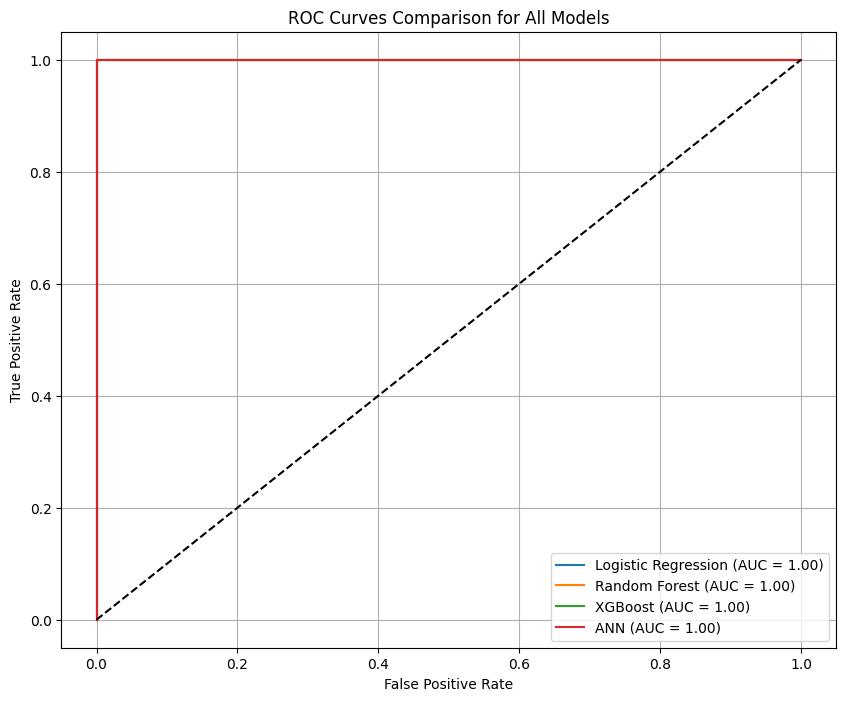

In [7]:
# Combine all ROC curves
plt.figure(figsize=(10, 8))

# ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# ROC curve for ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_proba_ann.ravel())
auc_ann = auc(fpr_ann, tpr_ann)
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [9]:
# Sample prediction
# Create a sample input (make sure it matches your feature order)
sample = pd.DataFrame({
    'Q1': [1],
    'Q2': [1],
    'Q3': [0],
    'Q4': [0],
    'Q5': [1],
    'Q6': [0],
    'Q7': [1],
    'Q8': [0],
    'Q9': [0],
    'Q10': [1],
    'Age_in_Months': [36],
    'Qchat_Score': [5],
    'Gender': [1],  # Encoded value
    'Jaundice_History': [0],  # Encoded value
})

# Make predictions with all models
# Scale the sample for ANN
sample_scaled = scaler.transform(sample)

print("\nPredictions for sample input:")
print("Logistic Regression:", "Yes" if lr_model.predict(sample)[0] == 1 else "No")
print("Random Forest:", "Yes" if rf_model.predict(sample)[0] == 1 else "No")
print("XGBoost:", "Yes" if xgb_model.predict(sample)[0] == 1 else "No")
print("ANN:", "Yes" if ann_model.predict(sample_scaled)[0][0] > 0.5 else "No")

# Print probabilities
print("\nProbability of ASD for sample input:")
print(f"Logistic Regression: {lr_model.predict_proba(sample)[0][1]:.2f}")
print(f"Random Forest: {rf_model.predict_proba(sample)[0][1]:.2f}")
print(f"XGBoost: {xgb_model.predict_proba(sample)[0][1]:.2f}")
print(f"ANN: {ann_model.predict(sample_scaled)[0][0]:.2f}")


Predictions for sample input:
Logistic Regression: Yes
Random Forest: Yes
XGBoost: Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
ANN: Yes

Probability of ASD for sample input:
Logistic Regression: 1.00
Random Forest: 0.96
XGBoost: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
ANN: 1.00


In [10]:
import joblib

# Save models
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
ann_model.save('ann_model.h5')  # For the ANN, save using TensorFlow's save method


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and scale your training data
joblib.dump(scaler, 'scaler.pkl')  # Save the fitted scaler


['scaler.pkl']